In [96]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

## Housing price Dataset

In [108]:
dataSet = pd.read_csv('housingPrice.csv')
dataSet.head()

,Area,Rooms,Price
0,1043,4,1300000
1,903,3,750000
2,1425,6,1495000
3,2231,10,2700000
4,1300,4,1530000


In [109]:
x = dataSet[['Area', 'Rooms']].values
y = dataSet[['Price']]. values
model = LinearRegression()
model.fit(x,y)
print("Price of 2000sqft house with 4 rooms is:",int(model.predict([[2000,4]])))

Price of 2000sqft house with 4 rooms is: 1569393


## Breast Cancer Dataset

In [11]:
from sklearn.datasets import load_breast_cancer as bc

In [49]:
bc_data = bc()
X = bc_data.data
Y = bc_data.target

### Generating a random permutation of the dataSet

In [50]:
idx = np.random.permutation(X.shape[0])
X, Y = X[idx], Y[idx]
print(X.shape)

(569, 30)


### Normalize the data

In [69]:
XMean = np.mean(X, axis = 1, keepdims = True)
XMin = np.min(X, axis = 1, keepdims = True)
XMax = np.max(X, axis = 1, keepdims = True)
print(X[:1])
X_normalized = (X - XMin) / (XMax - XMin)
print(X_normalized[:1])

[[1.225e+01 2.244e+01 7.818e+01 4.665e+02 8.192e-02 5.200e-02 1.714e-02
  1.261e-02 1.544e-01 5.976e-02 2.239e-01 1.139e+00 1.577e+00 1.804e+01
  5.096e-03 1.205e-02 9.410e-03 4.551e-03 1.608e-02 2.399e-03 1.417e+01
  3.199e+01 9.274e+01 6.229e+02 1.256e-01 1.804e-01 1.230e-01 6.335e-02
  3.100e-01 8.203e-02]]
[[1.96623024e-02 3.60213315e-02 1.25506345e-01 7.48915392e-01
  1.27663038e-04 7.96294606e-05 2.36652059e-05 1.63927425e-05
  2.44022452e-04 9.20873670e-05 3.55597773e-04 1.82469959e-03
  2.52786493e-03 2.89575702e-02 4.32976463e-06 1.54937184e-05
  1.12554616e-05 3.45482146e-06 2.19634816e-05 0.00000000e+00
  2.27446710e-02 5.13529045e-02 1.48880973e-01 1.00000000e+00
  1.97786923e-04 2.85762860e-04 1.93612882e-04 9.78507541e-05
  4.93822740e-04 1.27839632e-04]]


In [68]:
XSd = np.sqrt(np.var(X, axis = 1, keepdims = True))
X_normalized_sd = (X - XMean) / XSd
print(X_normalized_sd[:1])

[[-0.24286422 -0.1683196   0.23944463  3.08018748 -0.33187943 -0.33209831
  -0.33235333 -0.33238647 -0.33134921 -0.33204154 -0.33084078 -0.3241464
  -0.32094222 -0.20050766 -0.33244144 -0.33239057 -0.33240988 -0.33244542
  -0.33236108 -0.33246117 -0.22881852 -0.09845687  0.34595786  4.2243268
  -0.33155989 -0.33115901 -0.33157891 -0.33201528 -0.33021092 -0.33187863]]


### Hyperparameters

In [74]:
randNum = np.abs(np.random.randn(100))*100
print(randNum)
import matplotlib.pyplot as plt
%matplotlib inline

[1.16624929e+01 4.70328270e+01 6.21921307e+01 2.51885569e+02
 1.05373747e+02 1.73792566e+02 6.72020666e+00 1.43127467e+02
 6.06474025e+00 1.72278019e+02 4.78839609e+01 2.18054731e+02
 3.86657538e+00 1.28123100e+02 4.60952539e+01 2.94686470e+02
 7.36672556e+01 2.67757689e-01 2.54123850e+02 2.68711496e+01
 1.25450688e+02 6.75239597e+01 2.19137876e+02 1.06861660e+02
 1.78776562e+02 3.81739418e+01 8.39395169e+01 1.20989653e+02
 1.00381468e+02 8.63604518e+01 4.89236697e+01 5.39674486e+01
 2.05539142e+00 1.89928132e+02 1.51146383e+00 3.95106384e+01
 2.66592803e+01 7.87553553e+01 1.73917557e+01 2.00420774e+02
 5.83403954e+01 8.48854183e+01 1.35807813e+02 5.95215344e+01
 4.62157707e+01 2.04086247e+00 1.11145031e+02 9.89274800e+00
 1.27870021e+02 1.39940798e+02 1.08294106e+02 7.33593886e+01
 1.16109548e+02 9.58388200e+01 8.97198637e+01 1.04512315e+02
 1.07064624e+02 9.55294273e+01 5.75900459e+01 5.68501631e+01
 1.30264851e+01 1.54090408e+01 9.03849615e+01 4.23053668e+01
 1.51022456e+02 1.168269

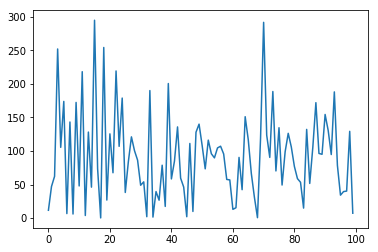

In [77]:
plt.plot(range(0,100), randNum)

In [89]:
randNumNorm = (randNum - np.min(randNum)) / (np.max(randNum) - np.min(randNum))

0.31223000649099547


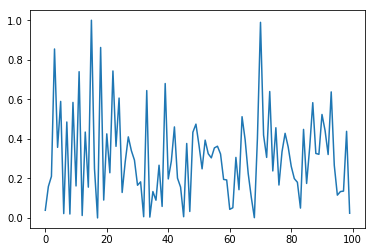

In [94]:
plt.plot(range(0,100),randNumNorm)
print(np.mean(randNumNorm))

In [85]:
randNumSig = 1 / (1 + np.exp(-1 * randNum))

0.9878132344159798


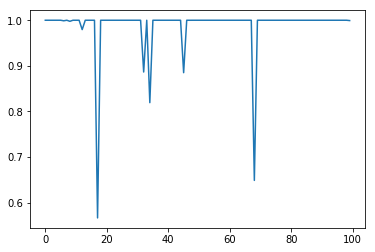

In [95]:
plt.plot(range(0,100), randNumSig)
print(np.mean(randNumSig))

In [91]:
randNumSd = (randNum - np.mean(randNum)) / np.sqrt(np.var(randNum))

1.3100631690576846e-16


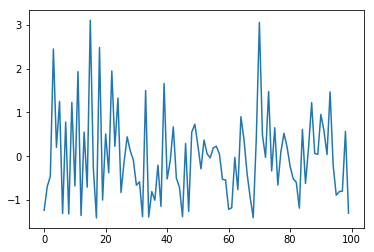

In [93]:
plt.plot(range(0,100), randNumSd)
print(np.mean(randNumSd))